In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Generate Data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

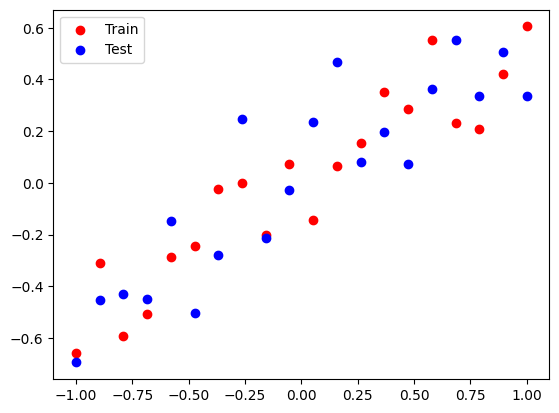

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

## Regression Model 

In [7]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

In [8]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.00411121966317296, Test: 0.04514961317181587


In [9]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 493ms/step


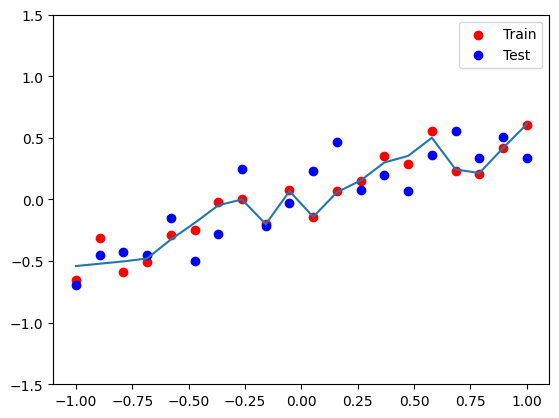

In [10]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')    ### overfittinh
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

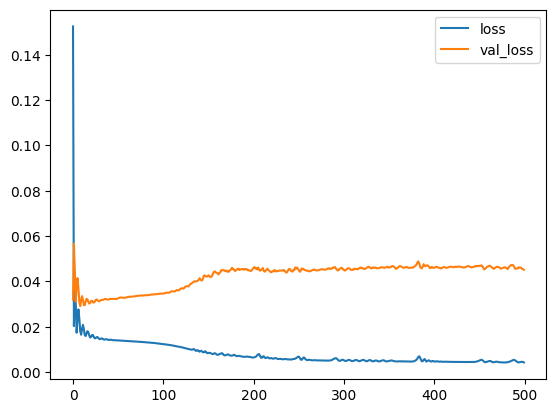

In [22]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [15]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

# DropOut Model 

In [31]:
model_2 = Sequential()

model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_2.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.1111 - mse: 0.1111 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 2/500
1/1 [==============================] - 0s 71ms/step - loss: 0.0649 - mse: 0.0649 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 3/500
1/1 [==============================] - 0s 70ms/step - loss: 0.0494 - mse: 0.0494 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 4/500
1/1 [==============================] - 0s 68ms/step - loss: 0.0628 - mse: 0.0628 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 5/500
1/1 [==============================] - 0s 74ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 6/500
1/1 [==============================] - 0s 76ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 7/500
1/1 [==============================] - 0s 78ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 8/500
1/1 [==============================] - 0s 73ms/step - loss: 0.0514 - mse: 0.0514

1/1 [==============================] - 0s 82ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 64/500
1/1 [==============================] - 0s 67ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 65/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 66/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 67/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 68/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 69/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 70/500
1/1 [==============================] - 0s 66ms/step - loss: 0.0158 - mse: 0.0158 - 

1/1 [==============================] - 0s 61ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0306 - val_mse: 0.0306
Epoch 126/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 127/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0290 - val_mse: 0.0290
Epoch 128/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 129/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 130/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 131/500
1/1 [==============================] - 0s 67ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 132/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0354 - mse: 0.

1/1 [==============================] - 0s 64ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 188/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 189/500
1/1 [==============================] - 0s 66ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 190/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 191/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 192/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 193/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 194/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0252 - mse: 0.

1/1 [==============================] - 0s 63ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 250/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 251/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 252/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 253/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 254/500
1/1 [==============================] - 0s 85ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 255/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 256/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0173 - mse: 0.

1/1 [==============================] - 0s 62ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 312/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 313/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 314/500
1/1 [==============================] - 0s 61ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 315/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 316/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 317/500
1/1 [==============================] - 0s 61ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 318/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0158 - mse: 0.

1/1 [==============================] - 0s 89ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 374/500
1/1 [==============================] - 0s 91ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 375/500
1/1 [==============================] - 0s 86ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 376/500
1/1 [==============================] - 0s 80ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 377/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 378/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 379/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 380/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0176 - mse: 0.

1/1 [==============================] - 0s 63ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 436/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 437/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 438/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 439/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 440/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 441/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 442/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0177 - mse: 0.

1/1 [==============================] - 0s 61ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 498/500
1/1 [==============================] - 0s 65ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 499/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 500/500
1/1 [==============================] - 0s 63ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0361 - val_mse: 0.0361


In [32]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.01456771232187748, Test: 0.03612949699163437


In [33]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 91ms/step


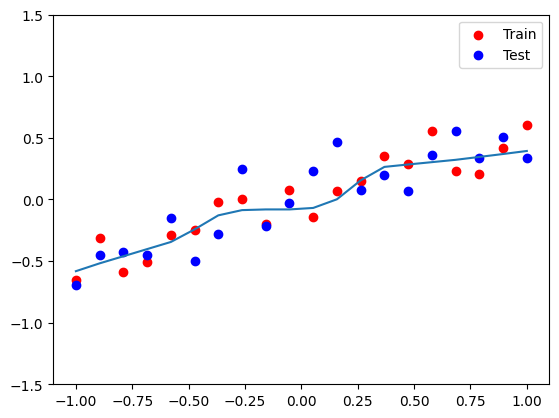

In [34]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

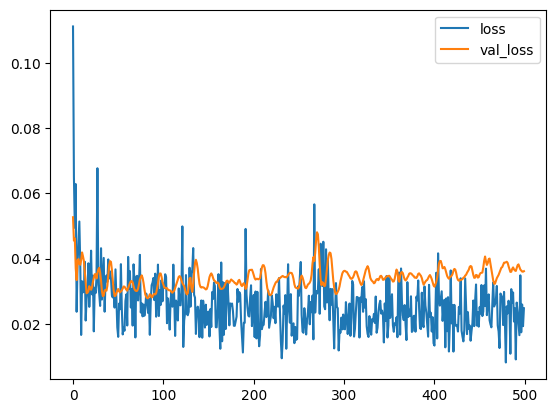

In [35]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()